# Basis function construction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import datetime

Load monitor data

In [2]:
monitor_df = pd.read_csv("./data/monitors_rnd.csv")
monitor_df.head()

,id,lat,lon,date,pm25
0,49-035-2005,40.597911,-111.894162,2020-06-01T00:00:00Z,-3.423297
1,49-035-2005,40.597911,-111.894162,2020-06-01T01:00:00Z,-2.813480
2,49-035-2005,40.597911,-111.894162,2020-06-01T02:00:00Z,0.826602
3,49-035-2005,40.597911,-111.894162,2020-06-01T03:00:00Z,3.774218
4,49-035-2005,40.597911,-111.894162,2020-06-01T04:00:00Z,5.990525


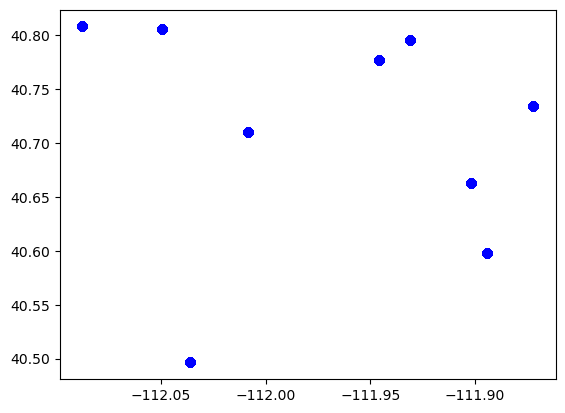

In [3]:
plt.plot(monitor_df['lon'], monitor_df['lat'], 'bo')

Load grid (we'll need to filter this down)

In [4]:
grid_gdf = geopandas.read_file("./data/coarse_grid_pts/grid_pts_coarse.shp")

<Axes: >

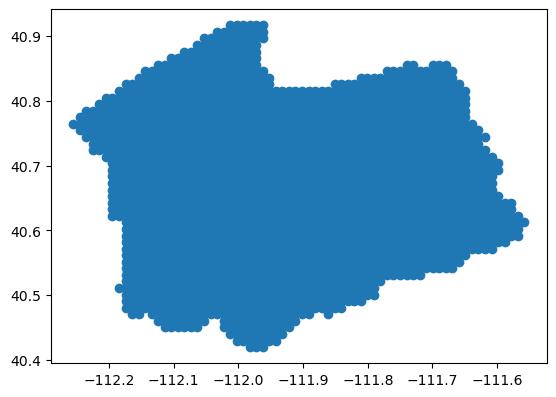

In [5]:
grid_gdf.plot()

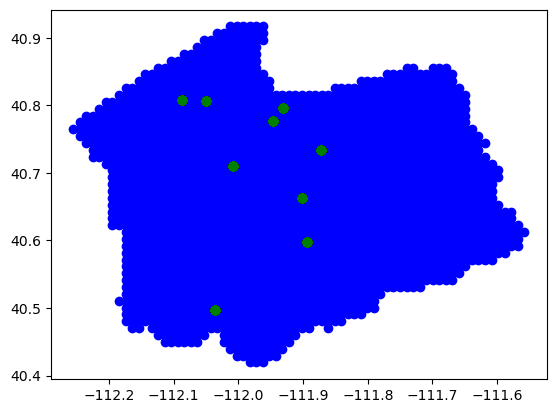

In [6]:
grid_crds = grid_gdf.get_coordinates()
plt.plot(grid_crds['x'], grid_crds['y'], 'bo')
plt.plot(monitor_df['lon'], monitor_df['lat'], 'go')

In [7]:
ebus = pd.read_csv("./data/EBUS_TEST_DATA/BUS04_2023_06.csv", header = [0,1],  
                 na_values = -9999.00)


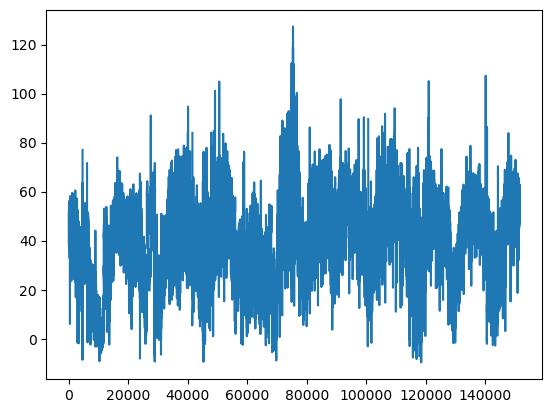

In [8]:
plt.plot(ebus['2B_Ozone_Concentration'])

## Get limits and standarize



### Coordinates

In [9]:
min_x = grid_crds.x.min()
max_x = grid_crds.x.max()
min_y = grid_crds.y.min()
max_y = grid_crds.y.max()
print(min_x, max_x, min_y, max_y)


-112.25516635714284 -111.55831564285714 40.419293290000006 40.916769710000004


In [10]:
lon = monitor_df.values[:,1]
lat = monitor_df.values[:,2]
normalized_lon = (lon-min_x)/(max_x - min_x)
normalized_lat = (lat-min_y)/(max_y-min_y)
N = lon.shape[0]
print(N)

256401


### Time

In [15]:
date = monitor_df['date']
date = pd.to_datetime(date)
# add the timezone:

print(date[0:10])
print(date.dtype)

0   2020-06-01 00:00:00+00:00
1   2020-06-01 01:00:00+00:00
2   2020-06-01 02:00:00+00:00
3   2020-06-01 03:00:00+00:00
4   2020-06-01 04:00:00+00:00
5   2020-06-01 05:00:00+00:00
6   2020-06-01 06:00:00+00:00
7   2020-06-01 07:00:00+00:00
8   2020-06-01 08:00:00+00:00
9   2020-06-01 09:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]
datetime64[ns, UTC]


In [16]:
date = date.astype('int64') / 1e9 ## Time in nanoseconds

In [18]:
min_t = date.min()
max_t = date.max()
print(min_t, max_t)

1590969600.0 1693526400.0


In [20]:
monitor_df['date2'] = (date - min_t) / (max_t-min_t)
monitor_df['date2']

0         0.000000
1         0.000035
2         0.000070
3         0.000105
4         0.000140
            ...   
256396    0.999860
256397    0.999895
256398    0.999930
256399    0.999965
256400    1.000000
Name: date2, Length: 256401, dtype: float64